In [25]:
# Import package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Stocks data

In [26]:
# Import data
stocks = pd.read_csv('stocks.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.0000,108.0625,116.5625
1,2000-01-04,102.500003,112.0625,102.0000,112.6250
2,2000-01-05,103.999997,116.0000,101.6875,113.8125
3,2000-01-06,94.999998,114.0000,100.0000,110.0000
4,2000-01-07,99.500001,113.5000,105.8750,111.4375


<Axes: xlabel='Date', ylabel='AAPL'>

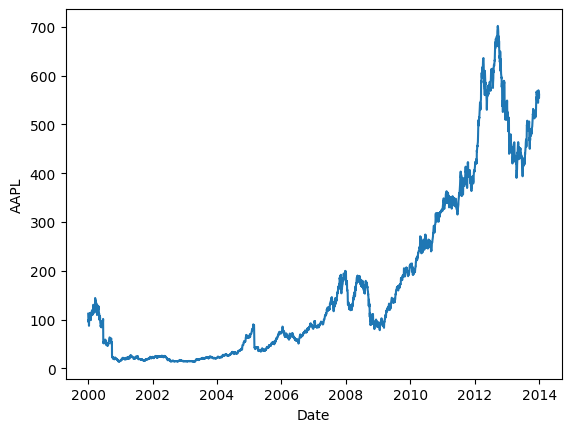

In [27]:
# Plot the stock price of AAPL by date
sns.lineplot(data = stocks, x = 'Date', y = 'AAPL')

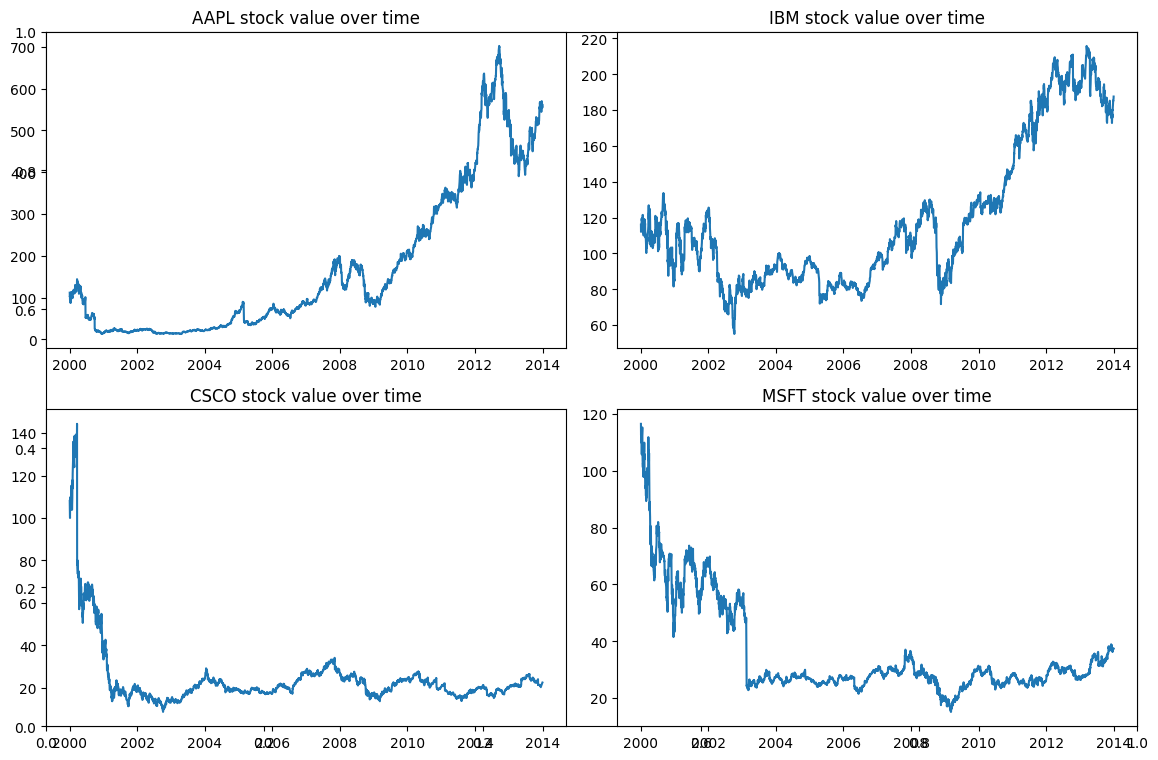

In [28]:
# Create subplots of the 4 stock prices
plt.subplots(figsize=(12, 8))

plt.subplot(2,2,1)
plt.plot(stocks['Date'], stocks['AAPL'])
plt.title('AAPL stock value over time')

plt.subplot(2,2,2)
plt.plot(stocks['Date'], stocks['IBM'])
plt.title('IBM stock value over time')

plt.subplot(2,2,3)
plt.plot(stocks['Date'], stocks['CSCO'])
plt.title('CSCO stock value over time')

plt.subplot(2,2,4)
plt.plot(stocks['Date'], stocks['MSFT'])
plt.title('MSFT stock value over time')

plt.tight_layout()
plt.show()

## 2. Cars data

In [29]:
# Import cars data
cars = pd.read_csv('cars.csv')
cylenders = cars['cylenders'].value_counts()
cylenders

cylenders
 6     190
 4     136
 8      87
 5       7
 12      3
 10      2
-1       2
 3       1
Name: count, dtype: int64

<Axes: xlabel='horsepower', ylabel='Price'>

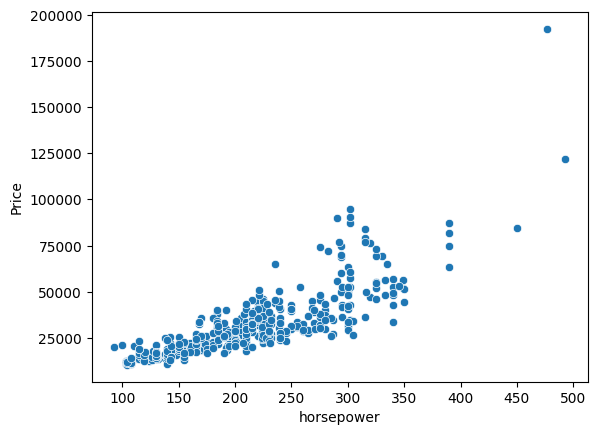

In [30]:
# Choose the most common cars
cars_common = cars[cars['cylenders'].isin([4, 6, 8])]

# Plot the relationship between horsepower and price
sns.scatterplot(data = cars_common, x = cars_common['horsepower'], y = cars_common['Price'])

<Axes: xlabel='horsepower', ylabel='city_miles_per_galloon'>

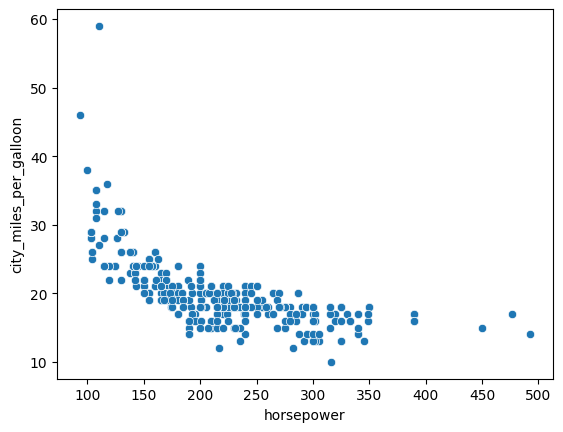

In [31]:
# Plot the relationship between horsepower and city_miles_per_galloon
sns.scatterplot(data = cars_common, x = cars_common['horsepower'], y = cars_common['city_miles_per_galloon'])

<Axes: xlabel='horsepower', ylabel='city_miles_per_galloon'>

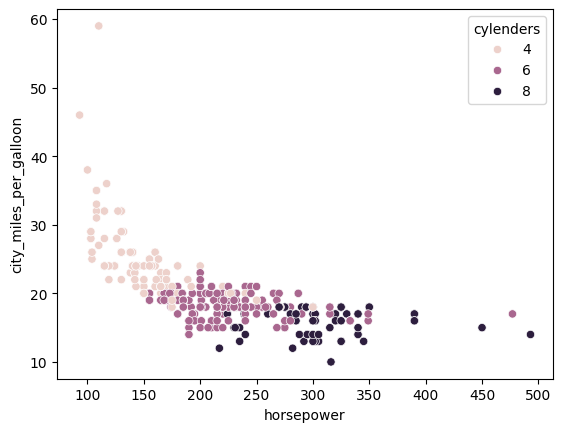

In [32]:
# Plot the relationship between horsepower and city_miles_per_galloon with different colors for cylenders
sns.scatterplot(data = cars_common, x = cars_common['horsepower'], y = cars_common['city_miles_per_galloon'], hue = cars_common['cylenders'])

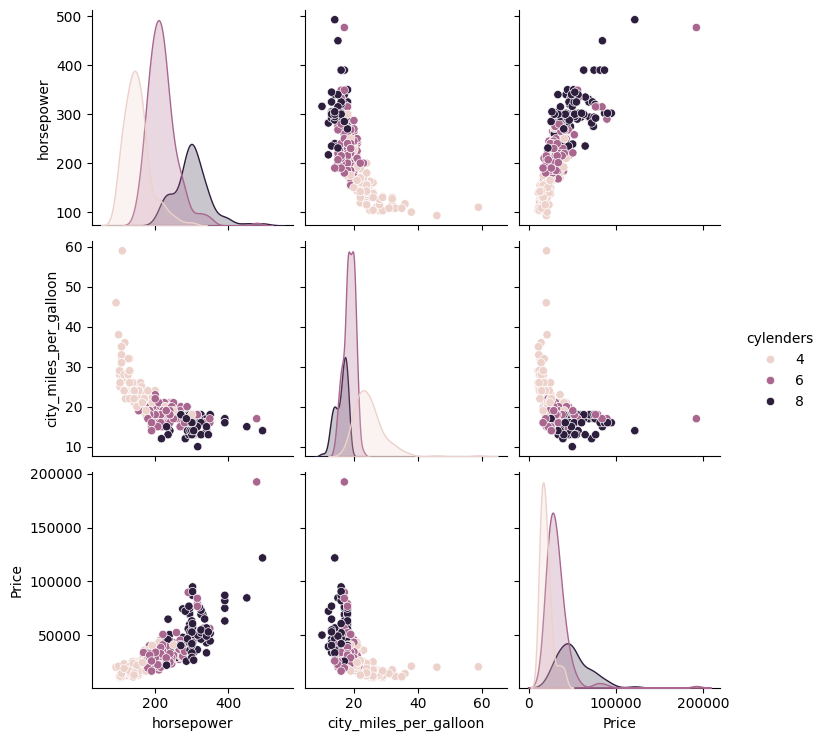

In [33]:
# Plot the pairplot for horsepower, city_miles_per_galloon, Price, and cylenders
sns.pairplot(cars_common[['horsepower', 'city_miles_per_galloon', 'Price', 'cylenders']], hue = 'cylenders')

## 3. Retail data

In [34]:
# Import retail data
retail = pd.read_csv('online_retail2.csv').drop_duplicates(ignore_index=True).dropna(axis=0, how='any')
retail['Country'].value_counts()

Country
United Kingdom          716115
Germany                  17339
EIRE                     16014
France                   13897
Netherlands               5137
Spain                     3754
Belgium                   3110
Switzerland               3058
Portugal                  2414
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1343
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                521
United Arab Emirates       386
Singapore                  346
Israel                     321
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94


In [35]:
# Filter the data for EIRE and France
ire_fran = retail[(retail['Country']=='EIRE') | (retail['Country']=='France')]
ire_fran.value_counts(subset='Country')

Country
EIRE      16014
France    13897
Name: count, dtype: int64

<Axes: xlabel='Country', ylabel='count'>

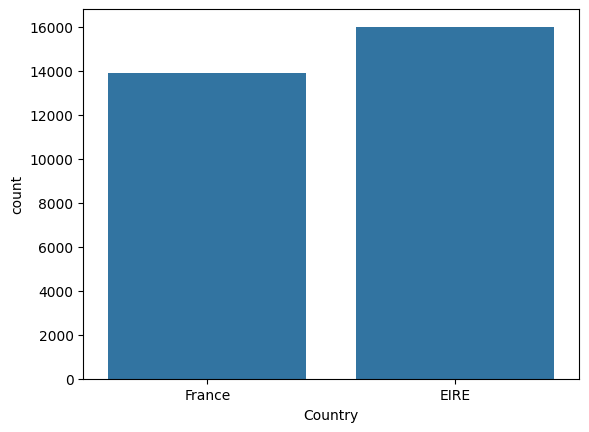

In [36]:
# Plot the number of transactions for EIRE and France
sns.countplot(data = ire_fran, x = 'Country')

In [37]:
# Change the data type and add a column for day of week
ire_fran['InvoiceDate'] = pd.to_datetime(ire_fran['InvoiceDate'])
ire_fran['dayofweek'] = ire_fran['InvoiceDate'].dt.weekday

# Create a dictionary for day of week
week_dict = dict({0:'Monday',
                  1:'Tuesday',
                  2:'Wednesday',
                  3:'Thursday',
                  4:'Friday',
                  5:'Saturday',
                  6:'Sunday' })

# Map the day name to day of week
ire_fran['dow'] = ire_fran['dayofweek'].map(week_dict)

ire_fran.head()

C:\Users\thanh\AppData\Local\Temp\ipykernel_5472\2841170514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ire_fran['InvoiceDate'] = pd.to_datetime(ire_fran['InvoiceDate'])
C:\Users\thanh\AppData\Local\Temp\ipykernel_5472\2841170514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ire_fran['dayofweek'] = ire_fran['InvoiceDate'].dt.weekday
C:\Users\thanh\AppData\Local\Temp\ipykernel_5472\2841170514.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,dayofweek,dow
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France,1,Tuesday
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France,1,Tuesday
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France,1,Tuesday
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.0,France,1,Tuesday
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France,1,Tuesday


In [38]:
# Group the transactions by country and day of week with sum of quantity
grouped = ire_fran.groupby(by = ['Country', 'dow'], as_index = False).agg(total_qty=('Quantity', 'sum'))
grouped

,Country,dow,total_qty
0,EIRE,Friday,45835
1,EIRE,Monday,47061
2,EIRE,Sunday,31796
3,EIRE,Thursday,72652
4,EIRE,Tuesday,54930
5,EIRE,Wednesday,57443
6,France,Friday,34814
7,France,Monday,111764
8,France,Sunday,15321
9,France,Thursday,41462


<Axes: xlabel='dow', ylabel='total_qty'>

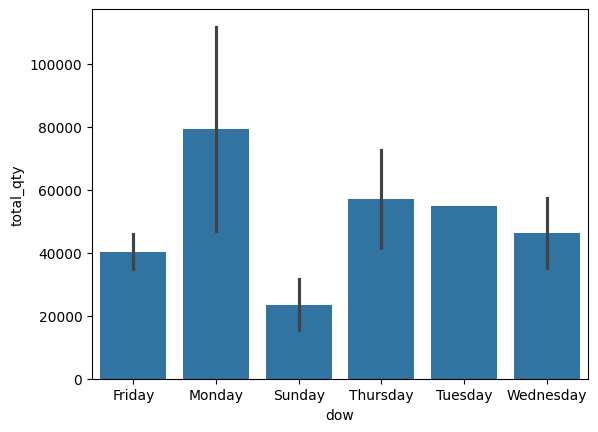

In [39]:
# Filter the data for positive quantity
grouped = grouped[grouped['total_qty'] >= 0]

# Plot the total quantity of transactions for EIRE and France by day of week
sns.barplot(data = grouped, x = 'dow', y = 'total_qty')

<Axes: xlabel='dow', ylabel='total_qty'>

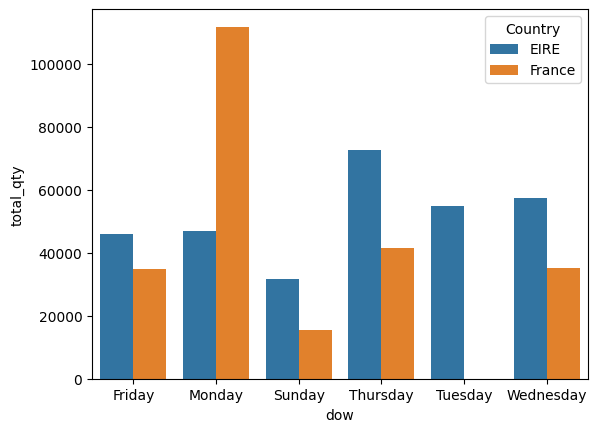

In [40]:
# Plot the total quantity of transactions for EIRE and France by day of week with different colors for country
sns.barplot(data = grouped, x = 'dow', y = 'total_qty', hue = 'Country')

## 4. Iris data

<Axes: xlabel='sepal_length', ylabel='Density'>

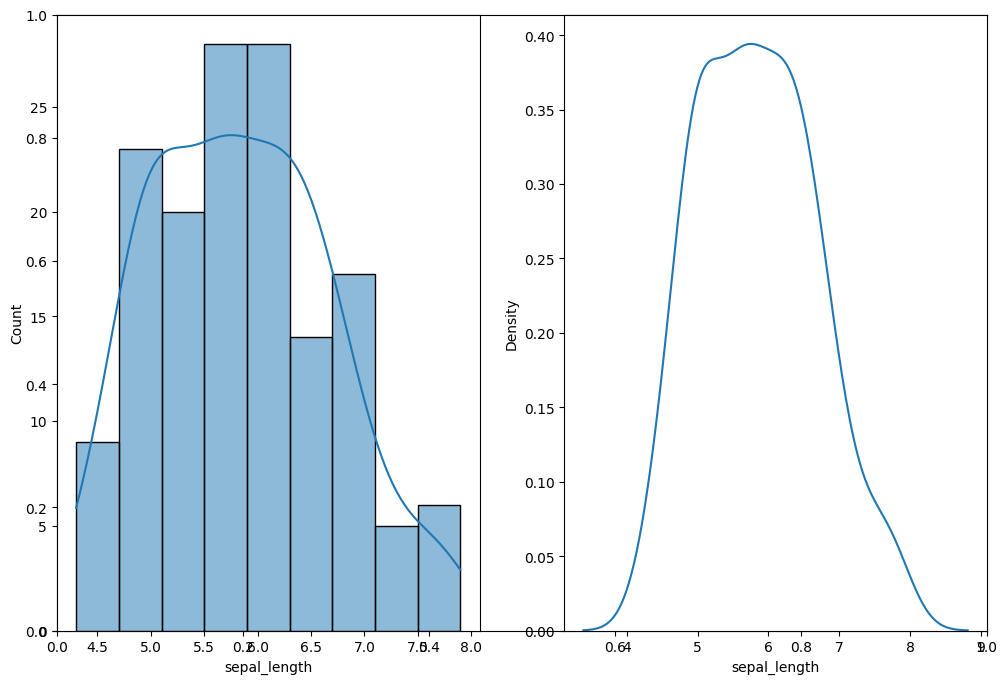

In [41]:
# Import iris data
iris = pd.read_csv('iris.csv')

# Plot the distribution of sepal length
plt.subplots(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(iris['sepal_length'], kde = True)

plt.subplot(1, 2, 2)
sns.kdeplot(iris['sepal_length'])

In [42]:
# Count of species
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='sepal_length', ylabel='Density'>

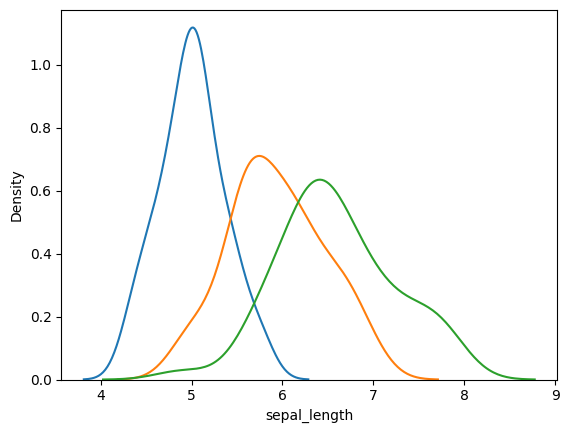

In [43]:
# Plot the distribution of sepal length for each species
sns.kdeplot(iris[iris['species'] == 'setosa']['sepal_length'], label =  'setosa')
sns.kdeplot(iris[iris['species'] == 'versicolor']['sepal_length'], label = 'versicolor')
sns.kdeplot(iris[iris['species'] == 'virginica']['sepal_length'], label = 'virginica')

<Axes: xlabel='sepal_width', ylabel='Density'>

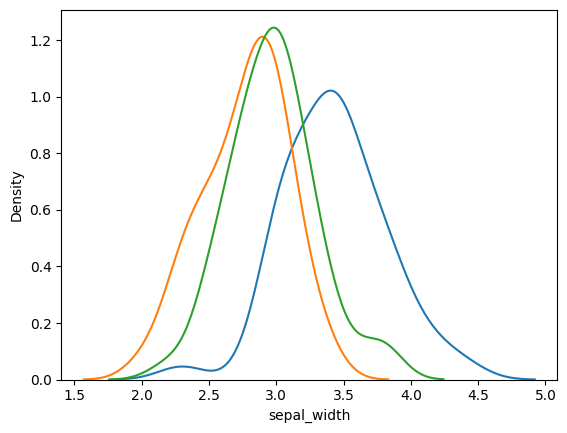

In [44]:
# Plot the distribution of sepal width for each species
sns.kdeplot(iris[iris['species'] == 'setosa']['sepal_width'], label =  'setosa')
sns.kdeplot(iris[iris['species'] == 'versicolor']['sepal_width'], label = 'versicolor')
sns.kdeplot(iris[iris['species'] == 'virginica']['sepal_width'], label = 'virginica')

<Axes: xlabel='species', ylabel='sepal_length'>

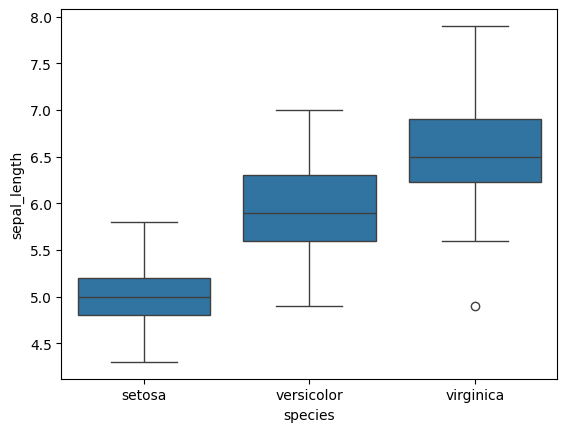

In [45]:
# Plot the boxplot of sepal length for each species
sns.boxplot(x=iris['species'], y=iris['sepal_length'], data=iris)

<Axes: xlabel='species', ylabel='sepal_width'>

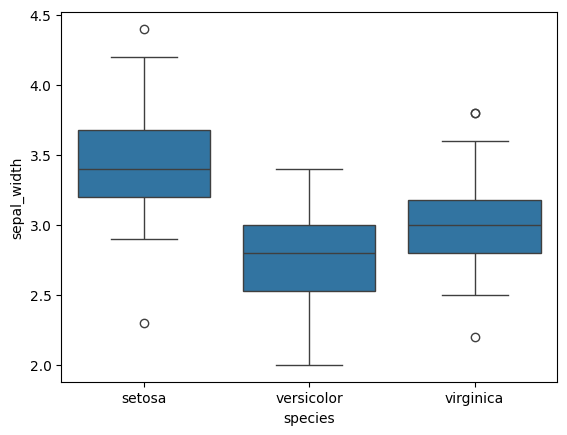

In [46]:
# Plot the boxplot of sepal width for each species
sns.boxplot(x=iris['species'], y=iris['sepal_width'], data=iris)

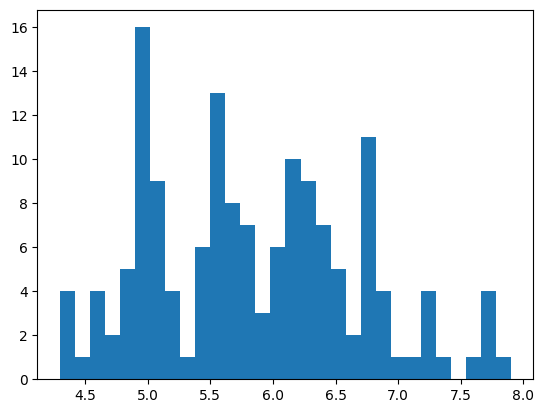

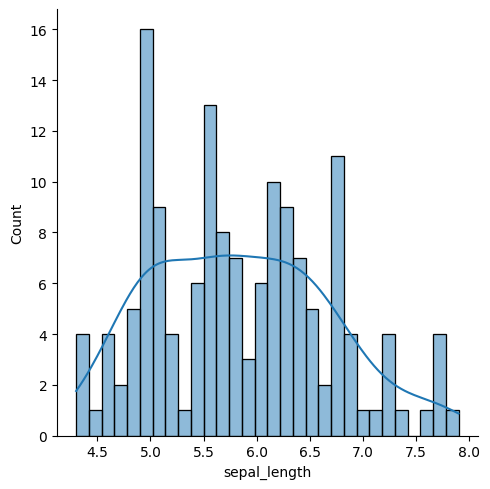

In [47]:
# Plot the histogram of sepal length

# using plt
plt.hist(x=iris['sepal_length'], bins=30)

# using sns
sns.displot(data=iris, x=iris['sepal_length'], bins=30, kde=True)

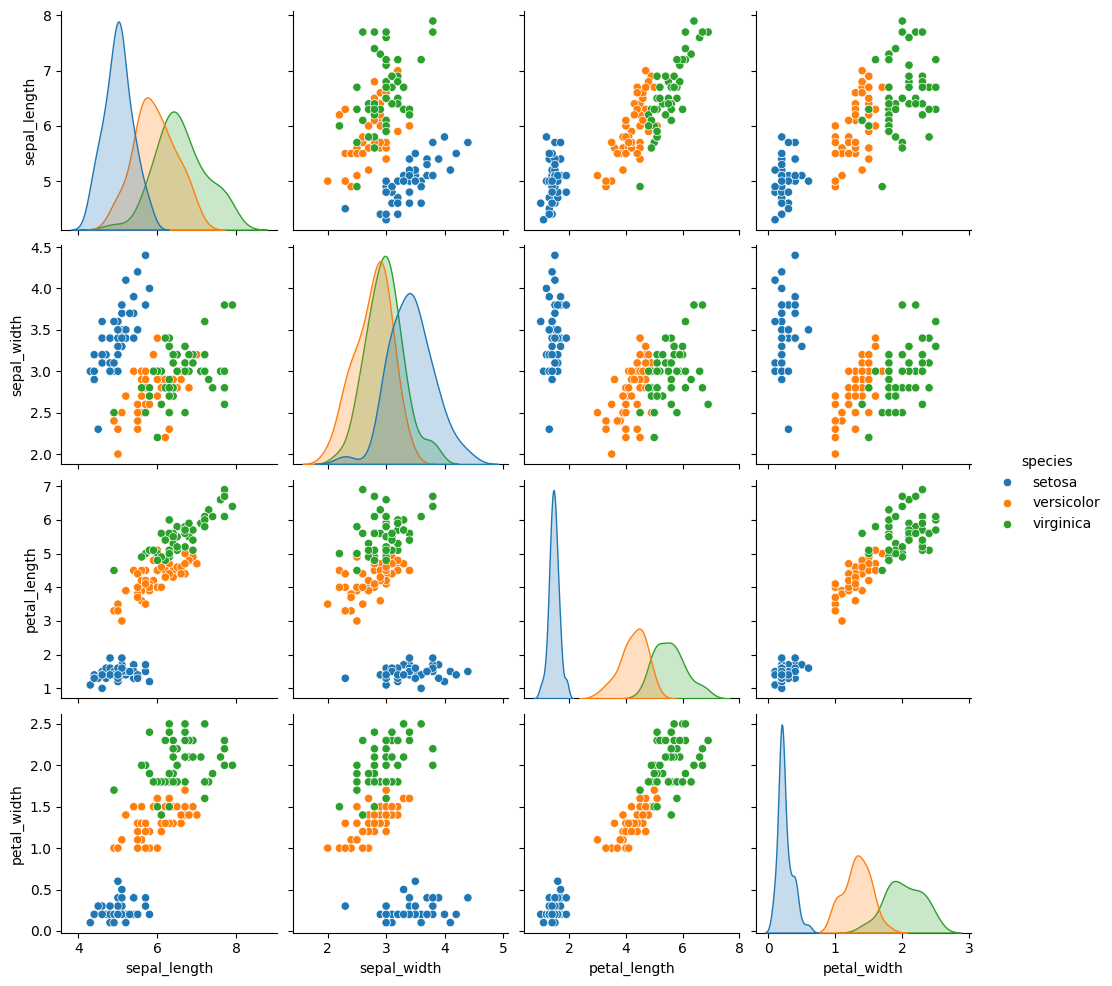

In [48]:
# Plot the pairplot of the iris data
sns.pairplot(data=iris, hue='species')